<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_3_4_Freq_Domain_Spectral_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management

library(TSA)
library(fpp2)
library(tidyverse)

# Spectral Analysis

* also known as *frequency domain analysis*. (TSAAR)
* A field of time series analysis which involves methodologies to extract insights on the regular periodic behavior of the time series data.

Comment:
* Analyzing time series data through the autocorrelations is what we would call analyzing time series data on the *time domain*
* Analyzing the preiodic/frequency/wave patterns in time series data is what we would call analyzing the time series data on the *frequency domain*.
* We typically do spectral analysis for stationary data. Often, the data is differenced or detrended before analysis is conducted.


## Wave Equation / Periodic Process (TSAAR, TSDAAR)

Let's begin with the basic wave equation, such that for time $t \in \mathbb{R}$,

$$x_t = R \cos (2\pi  f  t +\Phi)$$

$R=$ the *amplitude* of the wave, i.e., the height of the function from the x-axis

$f=$ the *frequency* of the time series, meaning how many times a pattern is observed in 1 unit of time. $\frac{1}{f}$ is often described as the *period* of the time series, in which the curve would repeat every $\frac{1}{f}$ time units.

$\Phi =$ is the *phase* or *shift* in the wave, which just determines the starting point of the wave.

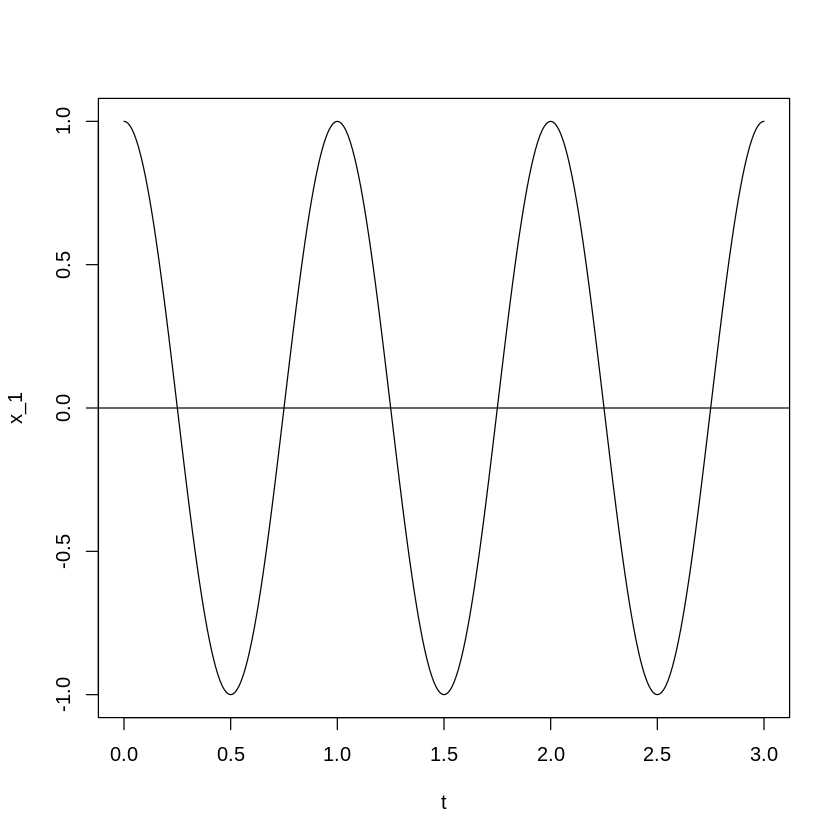

In [ ]:
## Basic Parts of the Wave Equation

## setup the t vector

t <- seq(from = 0, to = 3 , by = 0.01 )

## Base parameter setup

R1 <- 1
f1 <- 1
Phi1 <- 0

x_1 <- R1 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
abline(h = 0)

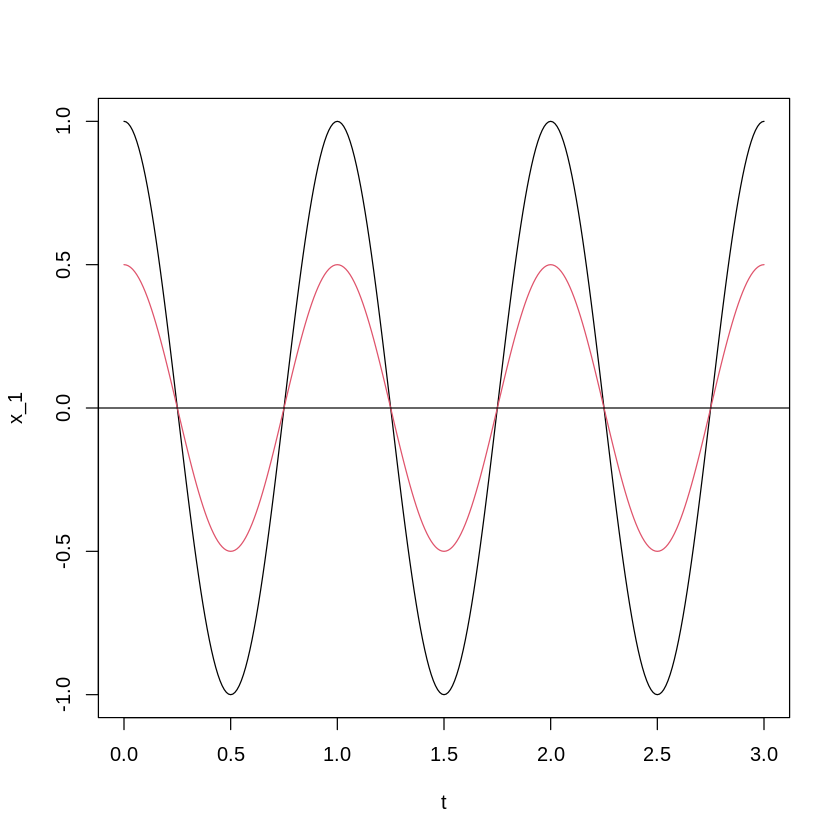

In [ ]:
## Changing Amplitude

R2 <- 0.5
f1 <- 1
Phi1 <- 0

x_2 <- R2 * cos(2*pi*f1 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

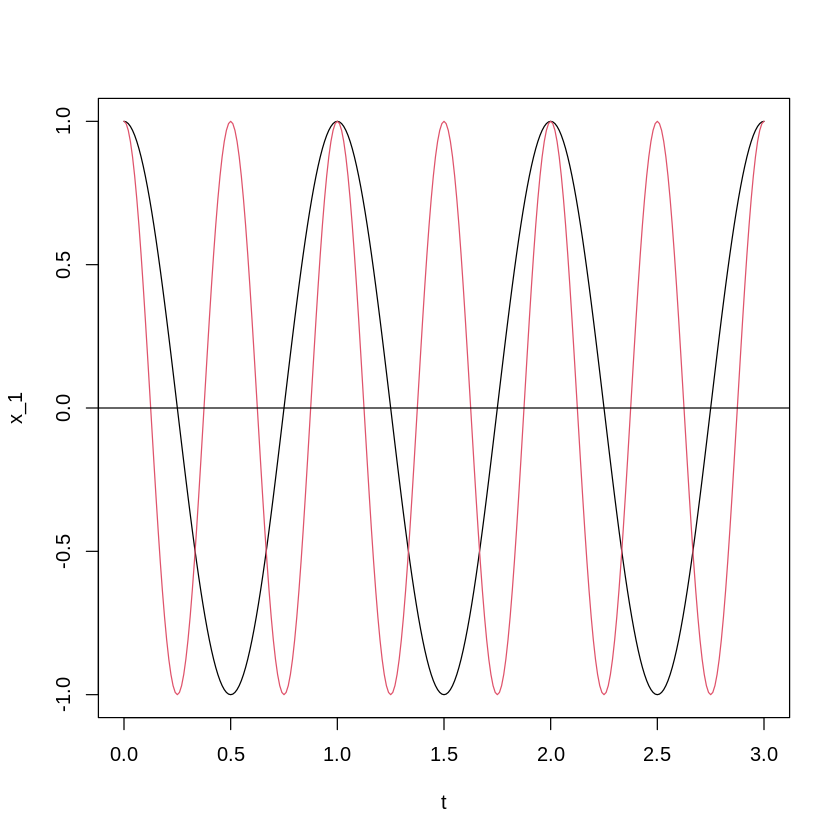

In [ ]:
## Changing Frequency

R1 <- 1
f2 <- 2
Phi1 <- 0

x_2 <- R1 * cos(2*pi*f2 *t +Phi1 )

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

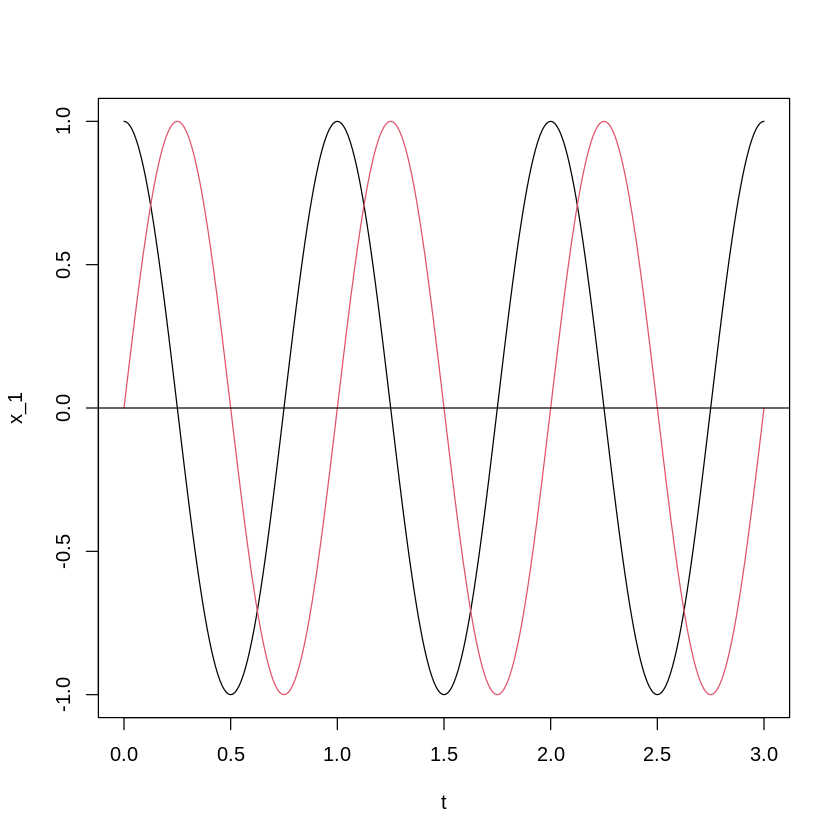

In [ ]:
## Changing Phase

R1 <- 1
f1 <- 1
Phi2 <- -pi/2

x_2 <- R1 * cos(2*pi*f1 *t + Phi2 )

## this shift is equivalent to the sine function with similar amplitude and frequency due to sine and cosine being complementary (thus "co-"sine)

## plot the data

plot(t, x_1, type = "l")
lines(t, x_2, col = 2)
abline(h = 0)

Note that the wave function above only works out for only one wave of which data often involves a sum of multiple waves at differing amplitudes, frequencies, and shifts, in addition to some randomness like a white noise process.

Using the example in TATSAIR (pp.151-152), let us plot the following waves that add up together to form a simulated data that is not that far off from what is seen from real data:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right)$$

$$X_{2t} = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right)$$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$



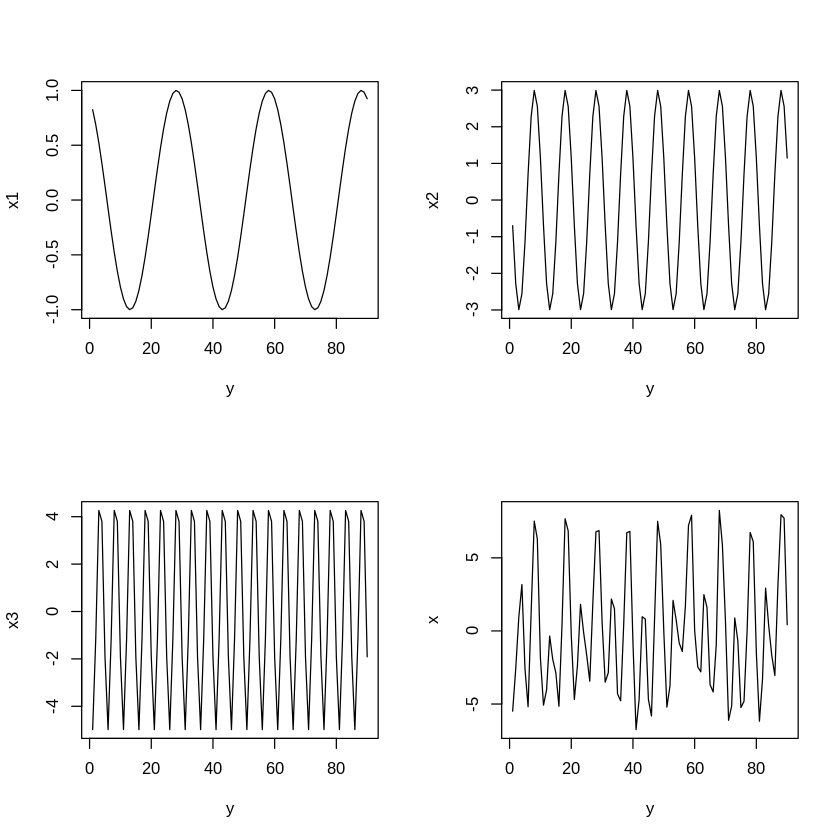

In [5]:
## Set Up Input
y<-seq(from = 1, to = 90, by = 1)

## Wave Components
x1<- 1*cos(2*pi*y*1/30 + pi/8)
x2<- 3*cos(2*pi*y*1/10 + 3*pi/8)
x3<- 5*cos(2*pi*y*1/5 + 5*pi/8)

## Set Seed for Normal White Noise
set.seed(1)
z<- rnorm(length(y), 0, 1)

## Summing UP Components
x<-x1+x2+x3+z

## Displaying Plots in a 2x2 setup
par(mfrow=c(2,2))

## Individual Wave Components and Simulated Data
plot(y, x1, type="l", xlab="y", ylab="x1")
plot(y, x2, type="l", xlab="y", ylab="x2")
plot(y, x3, type="l", xlab="y", ylab="x3")
plot(y, x, type="l", xlab="y", ylab="x")

Alternatively, we can express the same equation with the following equation (TSAAR):

$$x_t = R cos (2\pi  f  t +\Phi) = A \cos(2\pi ft) + B \sin(2\pi ft)$$

Where the two equations one-to-one transformations with

$$ R = \sqrt{A^2 + B^2} \quad , \quad \Phi = arctan (-B/A) $$

$$ A = R \cos(\Phi) \quad , \quad B = R \sin(\Phi) $$

With $arctan()$ being the arc tangent function defined with $\mathbb{R}$ as domain and itss range is $(-\pi/2, \pi/2)$.

In terms of statistical modeling, if we have data $y_t$ that we would like to fit a wave function with frequency $f$ as a known quantity before modeling, we can use $x_{1t} = \cos(2\pi ft)$ and $x_{2t} = \sin(2\pi ft)$ as independent variables with parameters $A$ and $B$ to be estimated by a model.

## The Harmonic Regression Model

By the re-expression of the wave function into a pair of sin and cos functions for a given frequency, we can fit these function pairs with different frequencies into periodic time series data with a model of the following form (TSAAR):

$$Y_t = A_0 + \sum_{j=1}^m \left[ A_j \cos(2\pi f_j t) + B_j \sin(2\pi f_j t) \right] + Z_t$$
$$Z_t \sim iid. N(0,\sigma^2)$$

Where $f_j$ are a frequencies of interest for the researcher.

If $f_j$ is a family of frequencies allowed for the data, called *Fourier frequencies*, the regression model becomes easier. For a number of data points $n$ with $k = [[n/2]]$, where $[[r]]$ truncates the decimal or fractional value of $r>0$, the Fourier frequencies are $f_j = 1/n, 2/n, ..., k/n$. The sine and cosine regressor variables are orthogonal and thus the coefficients are simpler to estimate.

In the odd $n = 2k +1$ case, the summation above is

$$Y_t = A_0 + \sum_{j=1}^k \left[ A_j \cos \left(2\pi \frac{j}{n} t \right) + B_j \sin \left(2\pi \frac{j}{n} t \right) \right] + Z_t$$

And the solutions to the parameters $A_j$ and $B_j$ are:

$$\hat{A}_0 = \bar{Y}$$

$$\hat{A}_j = \frac{2}{n} \sum_{t=1}^n Y_t \cos \left(2\pi \frac{j}{n} t \right) $$

$$\hat{B}_j = \frac{2}{n} \sum_{t=1}^n Y_t \sin \left(2\pi \frac{j}{n} t \right) $$

In the case of even $n = 2k$, the solution for $j = 1, 2,..., k-1$ is similar to the estimators above except for

$$\hat{A}_k = \frac{1}{n} \sum_{t=1}^n (-1)^{t} Y_t $$
$$\hat{B}_k = 0$$

Note that $f_k = 1/2$ when $n$ is even.

The estimation procedure above works whether there is a deterministic or stochastic model for the construction of the periodic function or periodic time series.

Using the example in TATSAIR, we can re-express the components into this form:

$$X_{1t} = \cos \left( 2\pi \times \frac{1}{30} \times t + \frac{\pi}{8}\right) = \left[  \cos \left( \frac{\pi}{8} \right) \right] \cos \left( 2\pi \times \frac{1}{30} \times t \right) + \left[  \sin \left( \frac{\pi}{8} \right) \right] \sin \left( 2\pi \times \frac{1}{30} \times t \right) $$

$$X_{2t}  = 3 \cos \left( 2\pi \times \frac{1}{10} \times t + \frac{3 \pi}{8}\right) = \left[  3 \cos \left( \frac{3 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{10} \times t \right) + \left[  3 \sin \left( \frac{3 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{10} \times t \right)$$

$$X_{3t} = 5 \cos \left( 2\pi \times \frac{1}{5} \times t + \frac{5 \pi}{8}\right) = \left[  5 \cos \left( \frac{5 \pi}{8}\right) \right] \cos \left( 2\pi \times \frac{1}{5} \times t \right) + \left[  5 \sin \left( \frac{5 \pi}{8}\right) \right] \sin \left( 2\pi \times \frac{1}{5} \times t \right) $$

$$Z_t \sim N(0,1)$$

$$X_t = X_{1t} + X_{2t} + X_{3t} + Z_t$$


If we would assume that $n = 90$ and ignore the stochastic term $Z_t$, i.e., just deal with $X_t^{(deterministic)} =  X_{1t} + X_{2t} + X_{3t}$, the values for $\hat{A}_j$ and $\hat{B}_j$ are:

for $f_3 = 3/90 = 1/30$: $\hat{A}_3 = \cos \left( \frac{\pi}{8} \right)$ and $\hat{B}_3 = \sin \left( \frac{\pi}{8} \right)$

for $f_9 = 9/90 = 1/10$: $\hat{A}_9 = 3 \cos \left( \frac{3 \pi}{8} \right)$ and $\hat{B}_9 = 3 \sin \left( \frac{3 \pi}{8} \right)$

for $f_{18} = 18/90 = 1/5$: $\hat{A}_{18} = 5 \cos \left( \frac{5 \pi}{8} \right)$ and $\hat{B}_{18} = 5 \sin \left( \frac{5 \pi}{8} \right)$

For other $f_j$, $\hat{A}_j = \hat{B}_j = 0$.

If ever we include the white noise $Z_t$, there will be some slight difference but not too drastic.

## The Periodogram

* for an odd sample size $n= 2k+1$, the periodogram $I$ at frequency $f=j/n$, for $j=1,2,...,k$ is defined as:

$$I \left( \frac{j}{n} \right) =\frac{n}{2} \left( \hat{A}_j^2 + \hat{B}_j^2  \right) $$

* for an even sample size $n = 2k$, the periodogram is similar for $j =1,2,...,k -1 $ as shown above except for

$$I \left( \frac{1}{2}\right) = n \hat{A}_k^2 $$

* the periodogram shows the relative strength of the sine-cosine pair at various frequencies.

* For odd $n$, the sum below has 2 degrees of freedom; for even $n$ it has 1 degree of freedom:

$$ (n-1) S_Y^2 = \sum_{t=1}^n \left( Y_t - \bar{Y}\right)^2 = \sum_{j=1}^k I \left( \frac{j}{n} \right) $$

* The periodogram breaks down which frequency contributes to the periodic behavior of the time series.

Let's demonstrate with a a code using the example from TATSAIR:

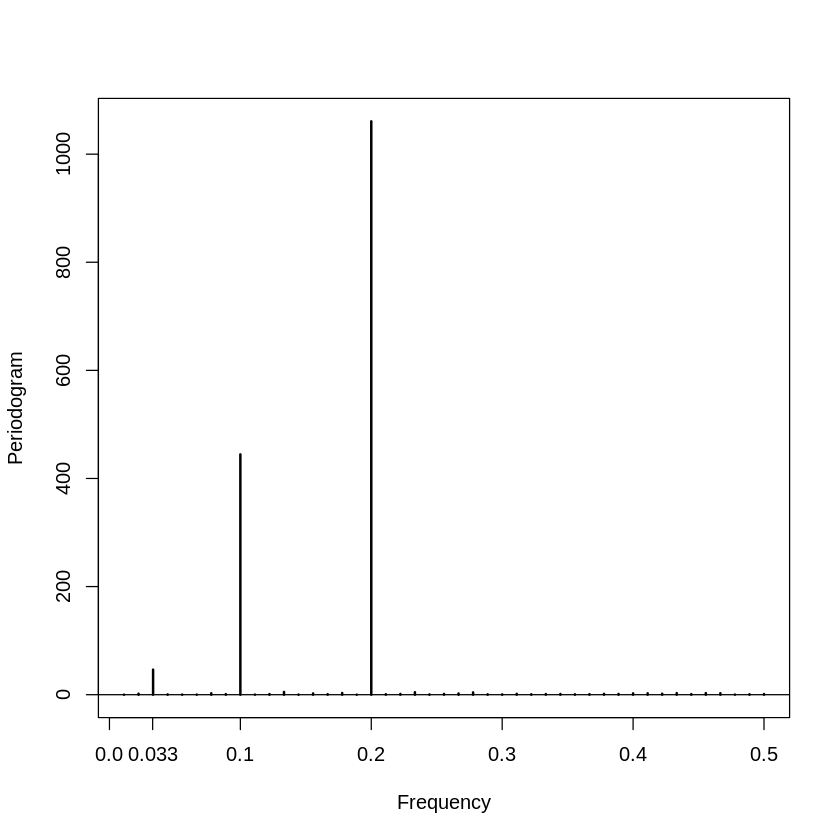

In [8]:
## Using the output from the TATSAIR Example

## generate the periodogram
periodogram(x)

## add a x-axis line
abline(h = 0)

## add an axis labels for 1/30
axis(1, at = 0.033)

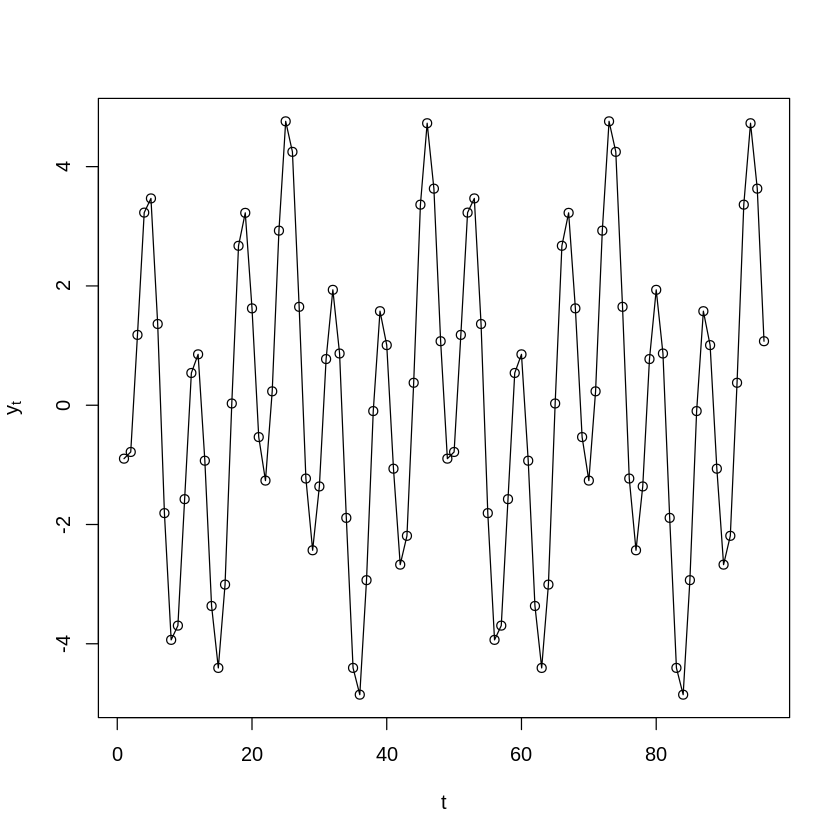

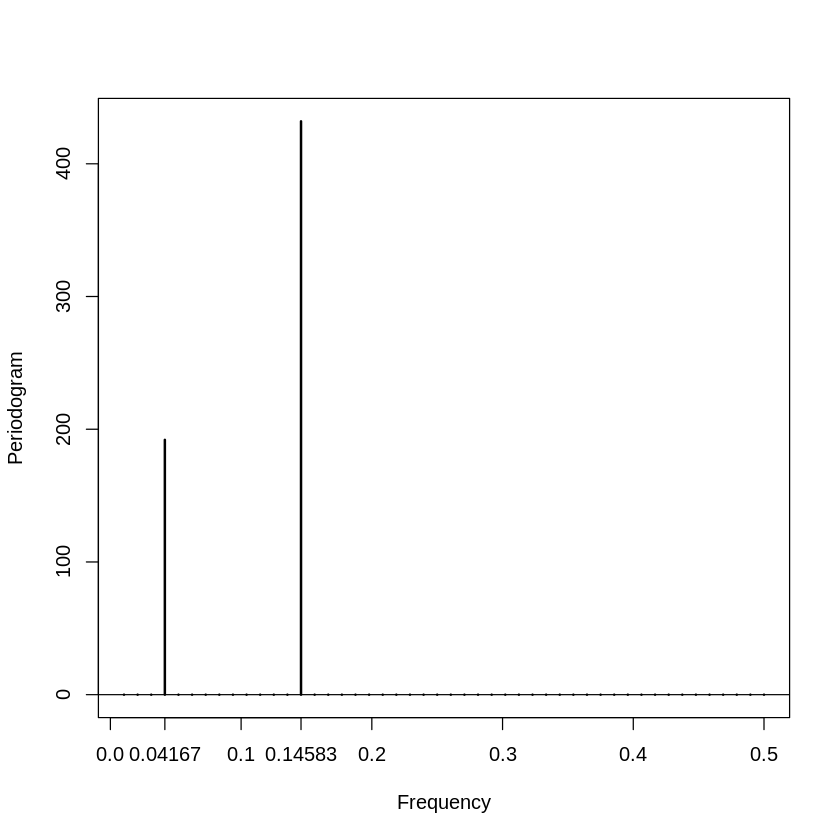

In [9]:
## Using a second example from TSAAR

t <- 1:96 ## time indices
cos1 <- cos(2*pi*t*4/96) ## 4/96 = 1/24
cos2 <- cos(2*pi*(t*14/96+.3)) ## = cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + sin(2*\pi*0.3) sin(2*pi*(t*14/96)) ;
## f = 14/96 = 7/48

## full series
y=2*cos1+3*cos2
## y = 2 cos(2*pi*t*4/96) + 3 cos(2*\pi*0.3) cos(2*pi*(t*14/96)) + 3 sin(2*\pi*0.3) sin(2*pi*(t*14/96))
plot(t,y,type='o',ylab=expression(y[t]))

## generate the periodogram
periodogram(y)

## add a x-axis line
abline(h = 0)

## add axis labels
axis(1,at=c(0.04167,.14583))

In [ ]:
## How to Extract the periodogram values

## Look at the objects inside the periodogram
str(periodogram(y))

## Frequency
periodogram(y)$freq

## Spectral Value
periodogram(y)$spec

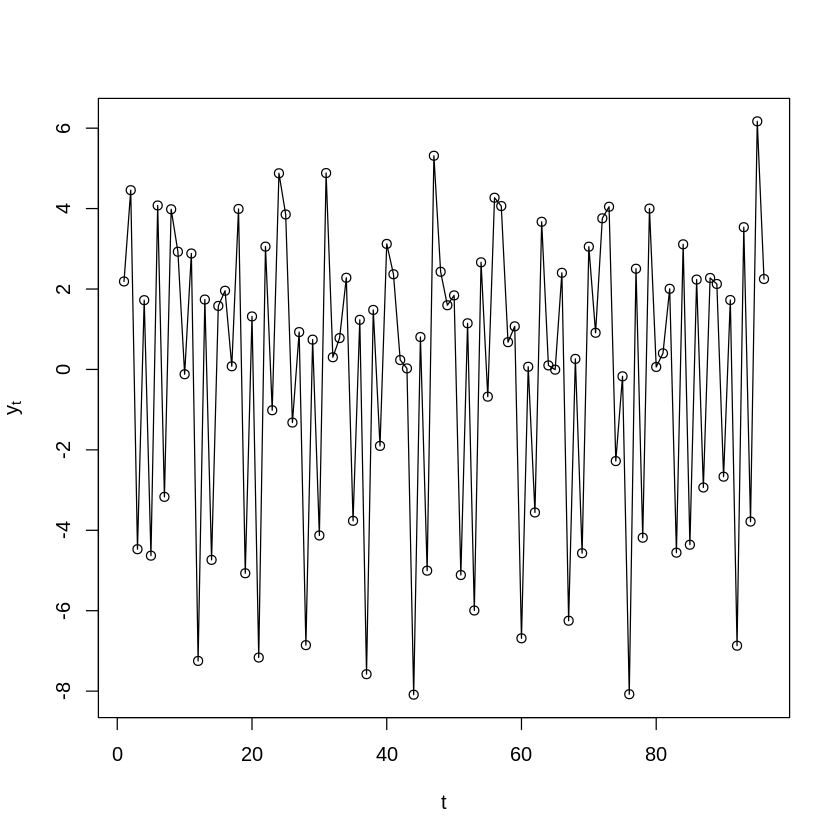

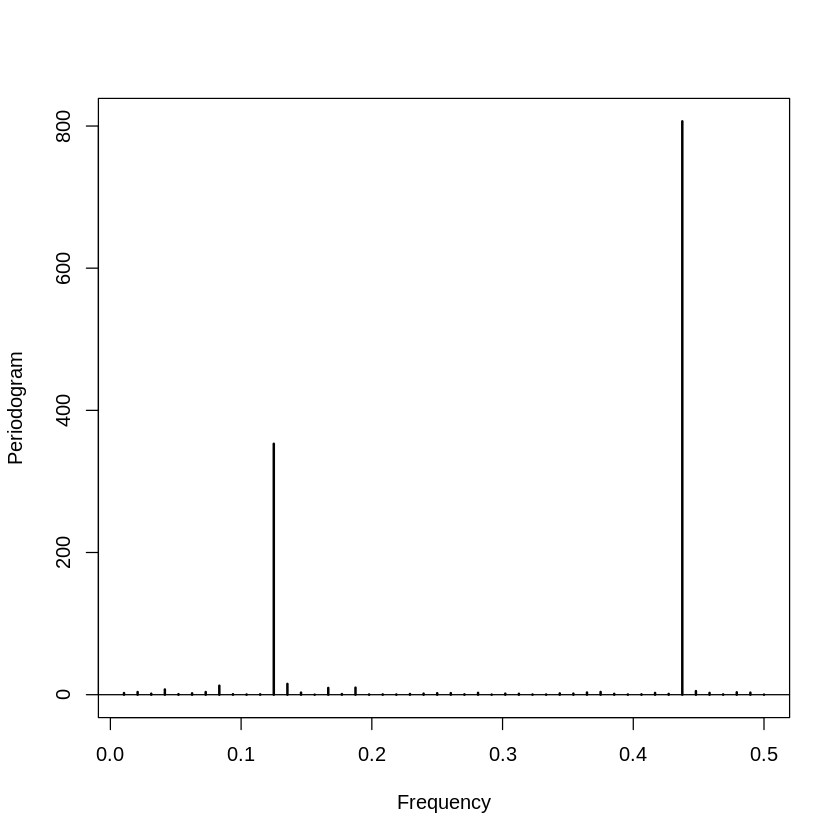

freq,spec
<dbl>,<dbl>
0.01041667,2.26027350
0.02083333,3.72868733
0.03125000,1.40862352
0.04166667,7.29313293
0.05208333,0.74067141
0.06250000,1.92892346
0.07291667,3.69499237
0.08333333,12.62329820
0.09375000,0.67348176


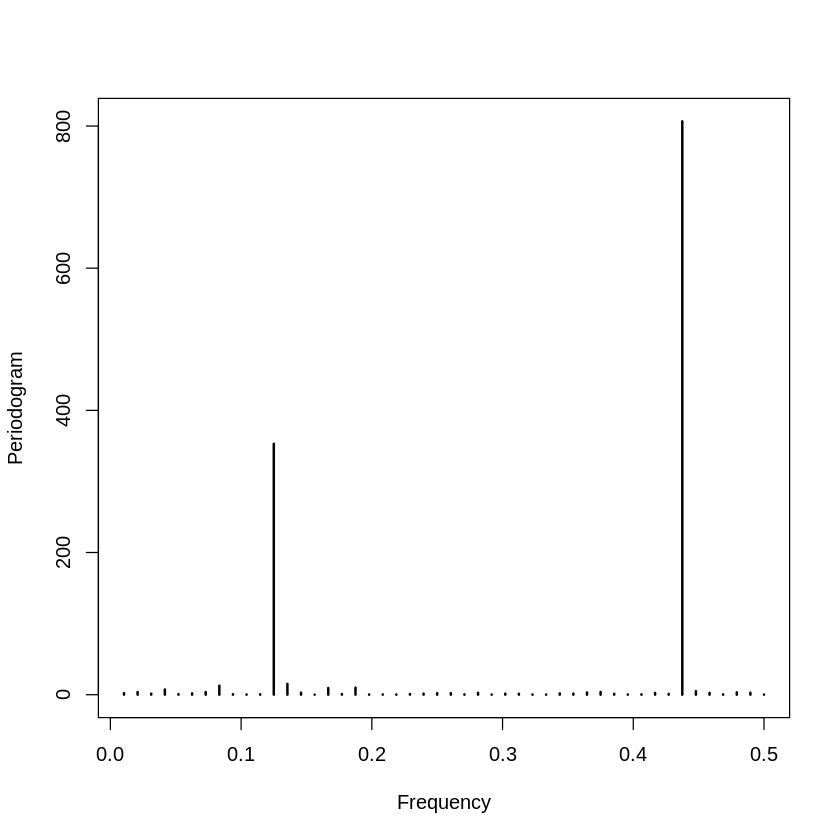

In [16]:
## Periodogram of Data with Hidden Periodicities

## Time Index
t <- 1:96

## Setting seed for random sample
set.seed(134)

## randomized frequency selected
integer <- sample(48,2)
freq1 <- integer[1]/96
freq2 <- integer[2]/96

## Randomly selecting coefficients
A1 <- rnorm(1,0,2)
B1 <- rnorm(1,0,2)
A2 <- rnorm(1,0,3)
B2 <- rnorm(1,0,3)

## Angle*time
w <- 2*pi*t

## Y Series generated
y <- A1*cos(w*freq1)+B1*sin(w*freq1)+A2*cos(w*freq2)+ B2*sin(w*freq2)+rnorm(96,0,1)

## Plot the data
plot(t,y,type='o',ylab=expression(y[t]))

## Periodogram

periodogram(y)
abline(h=0)

## Display Data Frame

data.frame(freq = periodogram(y)$freq, spec = periodogram(y)$spec)

From the periodogram, the two spikes seem to have been at $f = 1/8$ with $I(1/8) = 352.97 $ and $f= 7/16$ with $I(7/16) = 806.60 $. The different non-zero periodogram values were by nature of the randomness of the $A$ and $B$ terms.

Let's use a real data from TSAAR, the data on Variable Star Brightness on 600 Consecutive Nights.

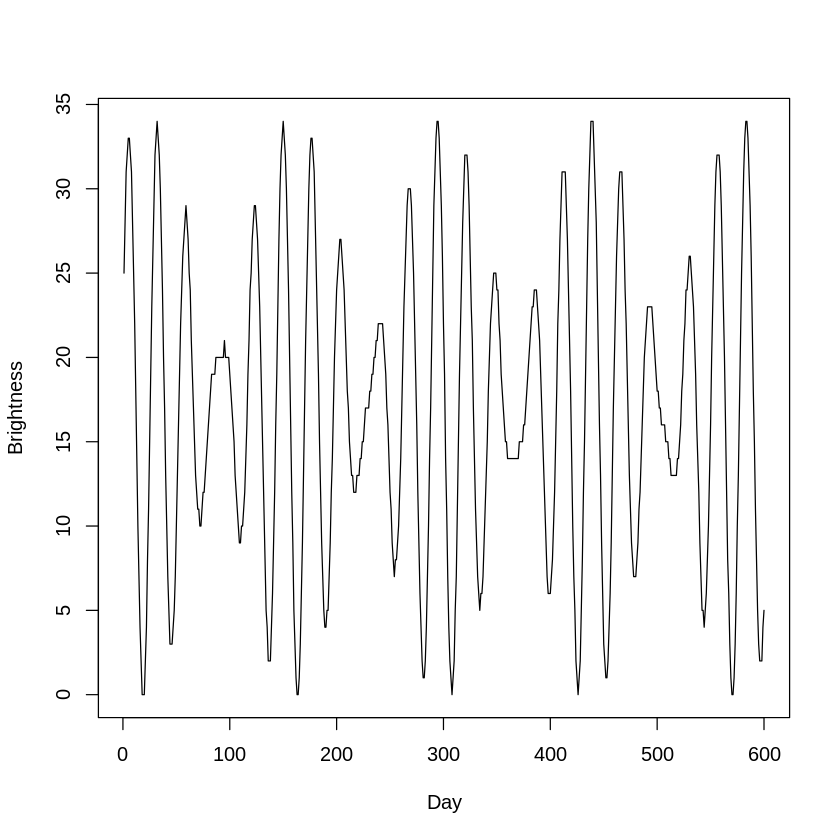

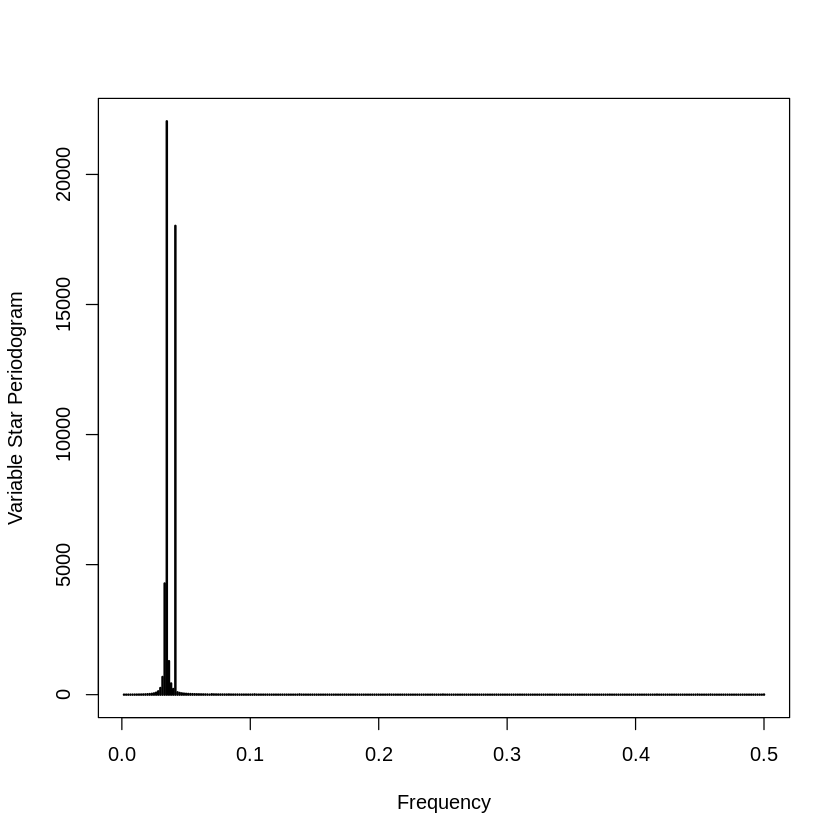

,freq,spec
,<dbl>,<dbl>
21,0.03500000,22041.6
25,0.04166667,18022.0


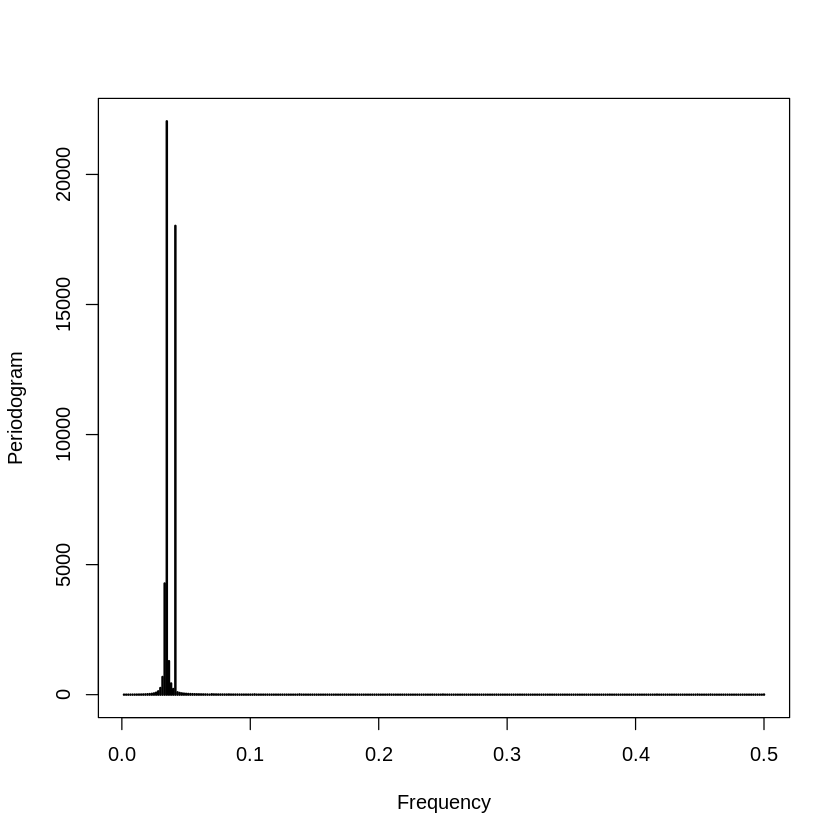

In [23]:
## Variable Star Brightness on 600 Consecutive Nights Example

## Attach data
data(star)

## Plot data
plot(star,xlab='Day',ylab='Brightness')

## Plot Periodogram
periodogram(star,ylab='Variable Star Periodogram')

## Extract Periodogram Values
periodogram_data <- data.frame(freq = periodogram(star)$freq, spec = periodogram(star)$spec)

## Which frequencies had large peaks
periodogram_data[which(periodogram_data$spec > 15000), ]

## Peaks were at f = 0.035 & f = 0.04166...
## equivalent to 1/f = 1/0.035 = 28.57 or about 29 days, which TSAAR used
## and 1/f = 1/0.04166... = 24 days

In [28]:
## Running a Harmonic Regression Model with the given frequencies

## Sample Size
n <- length(star)

## Time Index
t <- 1:n

## Frequencies
f1 <- 1/29
f2 <- 1/24

## Sin Cos Pairs
sin1 <- sin( 2*pi* f1 * t)
cos1 <- cos( 2*pi* f1 * t)
sin2 <- sin( 2*pi* f2 * t)
cos2 <- cos( 2*pi* f2 * t)

## Regression Estimation

hm1 <- lm(star ~ sin1+cos1+sin2+cos2)

summary(hm1)

## There is a very high R-Squared of 99.9%, Indicating an almost perfect fit.


Call:
lm(formula = star ~ sin1 + cos1 + sin2 + cos2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60716 -0.23237 -0.01491  0.20676  0.82649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.08580    0.01238  1380.4   <2e-16 ***
sin1         7.98648    0.01755   455.2   <2e-16 ***
cos1         6.06876    0.01753   346.2   <2e-16 ***
sin2         6.84309    0.01754   390.1   <2e-16 ***
cos2        -1.83495    0.01753  -104.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3031 on 595 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 1.313e+05 on 4 and 595 DF,  p-value: < 2.2e-16


Comments (TSAAR):
* We only note of positive frequencies $f$ since what can be expressed in $-f$ is also seen in $f$ by the symmetry of sine and cosine functions
* We only look at frequencies $0 < f \le 0.5$ to avoid the phenomenon of *aliasing*.

# References:

(TATSAIR): Chatfield C & Xing H (2019).  The analysis of time series: an introduction with R, Seventh Ed. CRC Press.

(TSAAR): Cryer JD & Chan K-S (2008). Time Series Analysis With Applications in R, Second Edition. Springer Science+Business Media, LLC.

(TSDAAUR): Shumway RH & Stoffer DS (2019). Time series: a data analysis approach using R. CRC Press.